# Proyecto 2

## Diego Franco - 20240

In [16]:
import os
import pandas as pd

### Lectura de los datos y separacion de la misma

In [17]:
#Lee el archivo CSV
data = pd.read_csv('data.csv')

# Dividir el dataset en Train, Dev, y Test (por ejemplo, 60%, 20%, 20%)
# train_data = data.sample(frac=0.6, random_state=42)
# remaining_data = data.drop(train_data.index)
# dev_data = remaining_data.sample(frac=0.5, random_state=42)
# test_data = remaining_data.drop(dev_data.index)

# Escribe los datasets en archivos nuevos
# train_data.to_csv('train.csv', index=False)
# dev_data.to_csv('dev.csv', index=False)
# test_data.to_csv('test.csv', index=False)

In [18]:
# train_df = pd.read_csv('train.csv')
# dev_df = pd.read_csv('dev.csv')
# test_df = pd.read_csv('test.csv')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 27 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   trans_date_trans_time         object 
 1   cc_num                        int64  
 2   merchant                      object 
 3   category                      object 
 4   amt                           float64
 5   first                         object 
 6   last                          object 
 7   gender                        object 
 8   street                        object 
 9   city                          object 
 10  state                         object 
 11  zip                           int64  
 12  lat                           float64
 13  long                          float64
 14  city_pop                      int64  
 15  job                           object 
 16  dob                           object 
 17  trans_num                     object 
 18  unix_time             

In [20]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03,4.153689e+03,4.530560e+04,3.762028e+02,4.567241e+00
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02,3.909005e+03,3.586752e+04,7.253531e+02,4.575502e+00
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00,1.000000e+00,1.020000e+00,0.000000e+00,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00,1.344790e+03,1.734142e+04,9.020000e+00,1.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00,3.071990e+03,3.743910e+04,7.589000e+01,3.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00,5.738470e+03,6.472088e+04,4.259800e+02,7.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00,4.326189e+04,2.190868e+05,1.204718e+04,4.800000e+01


In [21]:
data['merchant'].value_counts()
data['category'].value_counts()
data['gender'].value_counts()


F    1014749
M     837645
Name: gender, dtype: int64

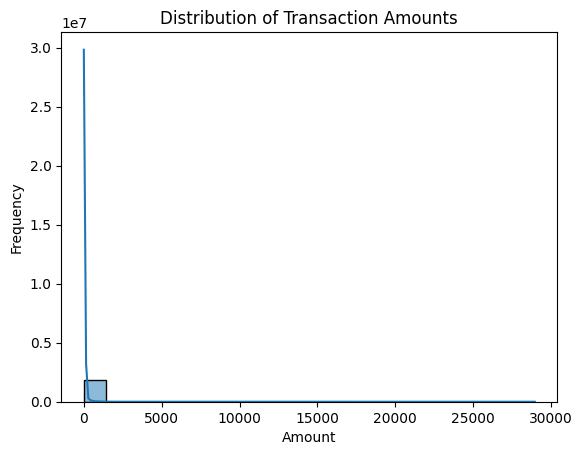

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['amt'], bins=20, kde=True)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()


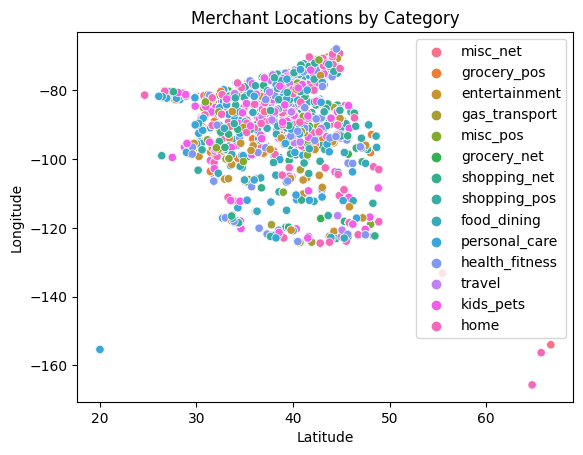

C:\Users\diego\AppData\Local\Temp\ipykernel_480\4208297057.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


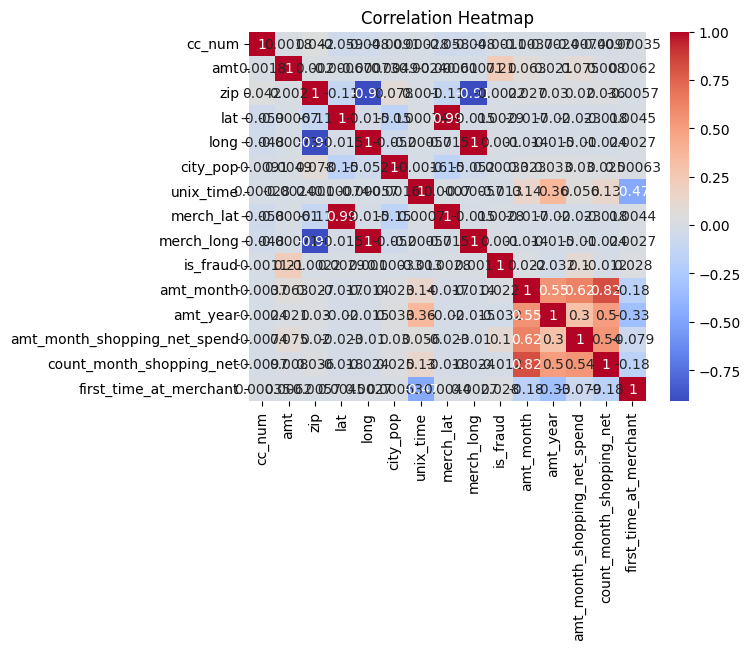

In [23]:
sns.scatterplot(x='lat', y='long', data=data, hue='category')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Merchant Locations by Category')
plt.legend(loc='upper right')
plt.show()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


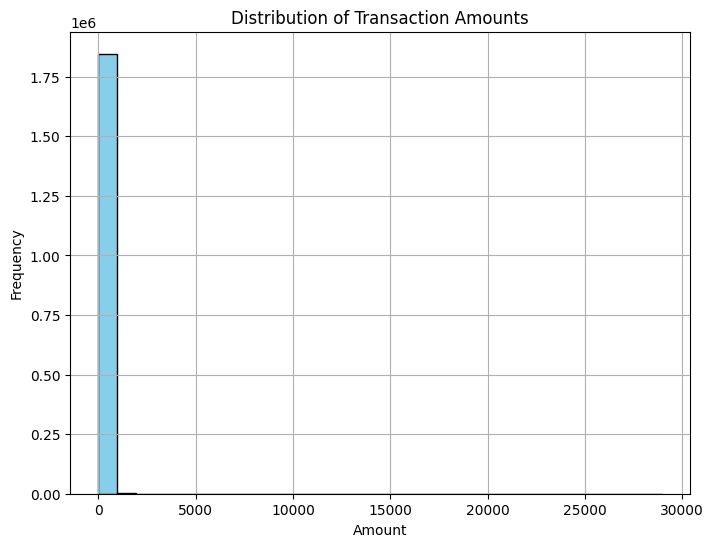

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data['amt'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.grid(True)
plt.show()


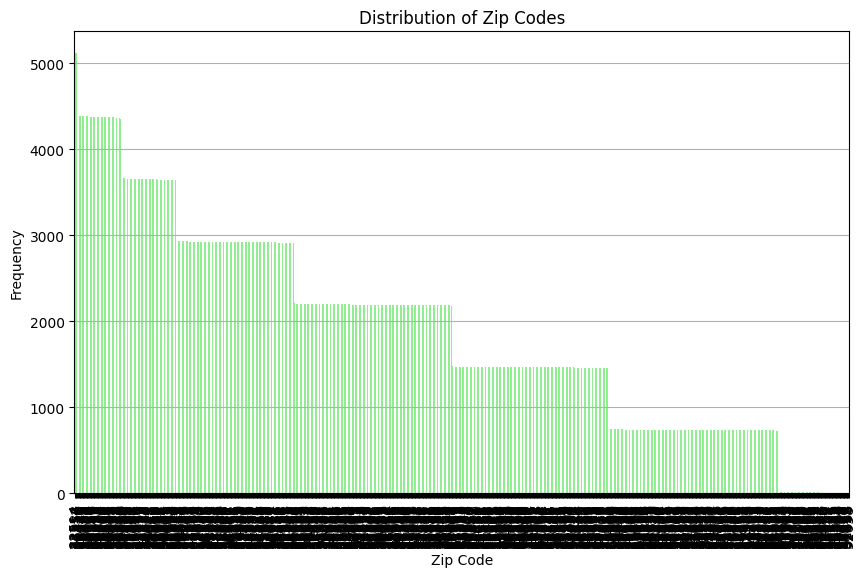

In [25]:
plt.figure(figsize=(10, 6))
data['zip'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Zip Code')
plt.ylabel('Frequency')
plt.title('Distribution of Zip Codes')
plt.grid(axis='y')
plt.show()


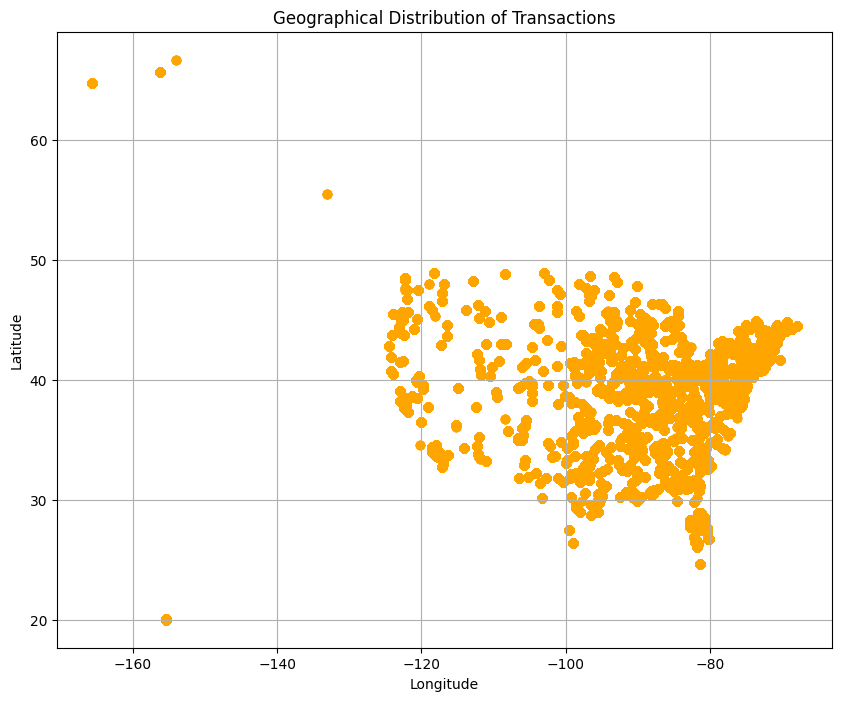

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(data['long'], data['lat'], alpha=0.5, color='orange')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Transactions')
plt.grid(True)
plt.show()


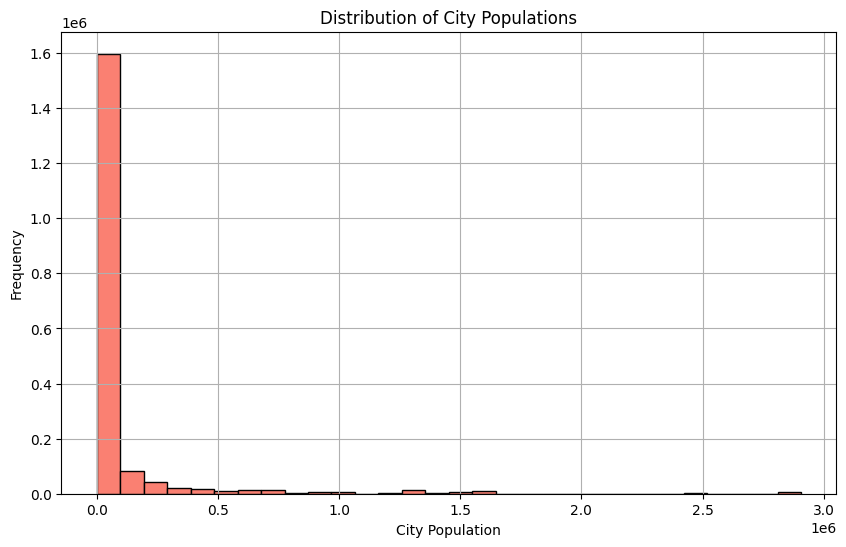

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(data['city_pop'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('City Population')
plt.ylabel('Frequency')
plt.title('Distribution of City Populations')
plt.grid(True)
plt.show()


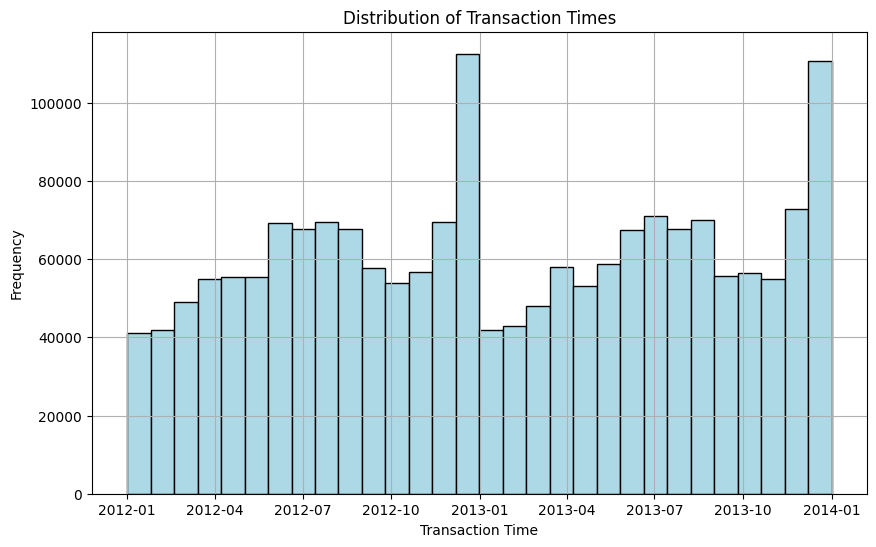

In [28]:
import datetime

# Convertir el tiempo Unix a formato de fecha y hora legible
data['transaction_time'] = pd.to_datetime(data['unix_time'], unit='s')

plt.figure(figsize=(10, 6))
data['transaction_time'].hist(bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Transaction Time')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Times')
plt.grid(True)
plt.show()


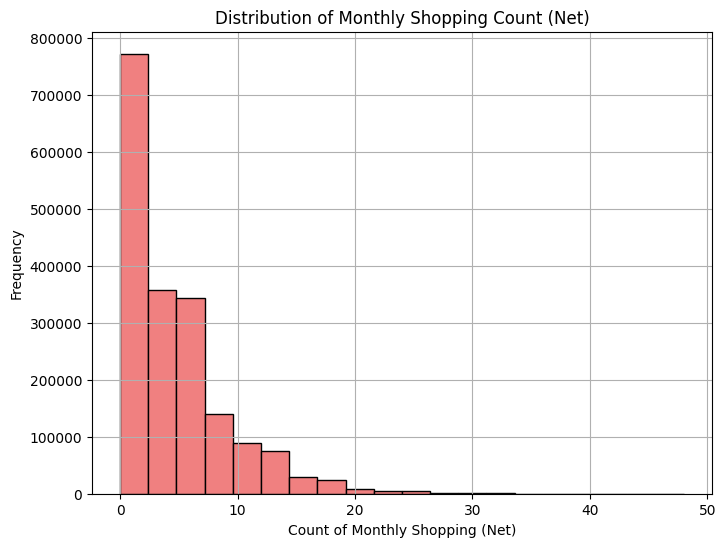

In [29]:
plt.figure(figsize=(8, 6))
plt.hist(data['count_month_shopping_net'].dropna(), bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Count of Monthly Shopping (Net)')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Shopping Count (Net)')
plt.grid(True)
plt.show()


## Transform columns to feature engineering

In [30]:
data["trans_date_trans_time"] = pd.to_datetime(data["trans_date_trans_time"])
data = data.sort_values(by='trans_date_trans_time')
data["cc_num"] = data["cc_num"].astype(str)
data["trans_num"].value_counts(dropna=False)

0b242abb623afc578575680df30655b9    1
ad44105b2defec28687e0c0c00db0dd2    1
fff81009b323191d0a427a2af21e5bc7    1
2341854d7594722011878c08ba3819dd    1
f7f00d638b16a8b1045d8a8978b607bd    1
                                   ..
74745c7e44a5172e919b2ea2538d0edb    1
71d44820f944faa2ed912043e859df48    1
986d5219c856c1ddcafe1a4ad35b844e    1
cf4fca8a9847c75240202201324dd34f    1
1765bb45b3aa3224b4cdcb6e7a96cee3    1
Name: trans_num, Length: 1852394, dtype: int64

In [31]:
data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net,first_time_at_merchant,transaction_time
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1325376018,36.011293,-82.048315,0,4.97,4.97,0.00,0.0,True,2012-01-01 00:00:18
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1325376044,49.159047,-118.186462,0,107.23,107.23,0.00,0.0,True,2012-01-01 00:00:44
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1325376051,43.150704,-112.154481,0,220.11,220.11,0.00,0.0,True,2012-01-01 00:00:51
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1325376076,47.034331,-112.561071,0,45.00,45.00,0.00,0.0,True,2012-01-01 00:01:16
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1325376186,38.674999,-78.632459,0,41.96,41.96,0.00,0.0,True,2012-01-01 00:03:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,1388534347,39.946837,-91.333331,0,11619.63,72134.23,1014.44,11.0,False,2013-12-31 23:59:07
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,1388534349,29.661049,-96.186633,0,15224.47,87115.43,3942.78,25.0,False,2013-12-31 23:59:09
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,1388534355,46.658340,-119.715054,0,26233.12,165389.30,2978.91,29.0,False,2013-12-31 23:59:15
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,1388534364,44.470525,-117.080888,0,11787.71,90698.65,768.69,17.0,False,2013-12-31 23:59:24


In [32]:
def get_amount_month_by_card(group):
    """
    Calculate the cumulative sum of transaction amounts per month for each credit card.

    Parameters:
    - group (DataFrame): A group of transactions for a specific credit card.

    Returns:
    DataFrame: The input DataFrame with an additional column 'amt_month' representing
    the cumulative sum of transaction amounts per month for each credit card.
    """
    group['amt_month'] = group.groupby([group['trans_date_trans_time'].dt.year, group['trans_date_trans_time'].dt.month])['amt'].cumsum()
    return group

data = data.groupby('cc_num').apply(get_amount_month_by_card).reset_index(drop=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_480\3903134162.py:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.groupby('cc_num').apply(get_amount_month_by_card).reset_index(drop=True)


In [33]:
def get_amount_anual_by_card(group):
    """
    Calculate the cumulative sum of transaction amounts per year for each credit card.

    Parameters:
    - group (DataFrame): A group of transactions for a specific credit card.

    Returns:
    DataFrame: The input DataFrame with an additional column 'amt_year' representing
    the cumulative sum of transaction amounts per year for each credit card.
    """
    group['amt_year'] = group.groupby(group['trans_date_trans_time'].dt.year)['amt'].cumsum()
    return group

data = data.groupby('cc_num').apply(get_amount_anual_by_card).reset_index(drop=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_480\2219508267.py:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.groupby('cc_num').apply(get_amount_anual_by_card).reset_index(drop=True)


In [34]:
year_month = ['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07',
 '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02',
 '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
 '2020-10', '2020-11', '2020-12']

def get_amount_month_by_card_shopping_net_spend(group):
    """
    Calculate the cumulative monthly spending on shopping_net category for each credit card.

    Parameters:
    - group (DataFrame): A group of transactions for a specific credit card.

    Returns:
    DataFrame: The input DataFrame with an additional column 'amt_month_shopping_net_spend' representing
    the cumulative monthly spending on shopping_net category for each credit card.
    """
    
    subset_shopping_net = group[group['category'] == 'shopping_net']
    group['amt_month_shopping_net_spend'] = subset_shopping_net.groupby(group['trans_date_trans_time'].dt.to_period('M'))['amt'].cumsum()

    group['y_month'] = group['trans_date_trans_time'].dt.to_period('M')
    for y_month in year_month:
        group.loc[group['y_month'] == y_month, 'amt_month_shopping_net_spend'] = group.loc[group['y_month'] == y_month, 'amt_month_shopping_net_spend'].fillna(method='ffill')
        group.loc[group['y_month'] == y_month, 'amt_month_shopping_net_spend'] = group.loc[group['y_month'] == y_month, 'amt_month_shopping_net_spend'].fillna(0)
        
    return group.drop('y_month', axis=1)


data = data.groupby('cc_num').apply(get_amount_month_by_card_shopping_net_spend).reset_index(drop=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_480\1452683630.py:29: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.groupby('cc_num').apply(get_amount_month_by_card_shopping_net_spend).reset_index(drop=True)


In [35]:
def get_count_trx_month_by_card_shopping_net(group):
    """
    Calculate the cumulative count of transactions in the shopping_net category per month for each credit card.

    Parameters:
    - group (DataFrame): A group of transactions for a specific credit card.

    Returns:
    DataFrame: The input DataFrame with an additional column 'count_month_shopping_net' representing
    the cumulative count of transactions in the shopping_net category per month for each credit card.
    """
    
    subset_shopping_net = group[group['category'] == 'shopping_net']
    group['count_month_shopping_net'] = subset_shopping_net.groupby(group['trans_date_trans_time'].dt.to_period('M')).cumcount() + 1

    group['y_month'] = group['trans_date_trans_time'].dt.to_period('M')
    for y_month in year_month:
        group.loc[group['y_month'] == y_month, 'count_month_shopping_net'] = group.loc[group['y_month'] == y_month, 'count_month_shopping_net'].fillna(method='ffill')
        group.loc[group['y_month'] == y_month, 'count_month_shopping_net'] = group.loc[group['y_month'] == y_month, 'count_month_shopping_net'].fillna(0)
        
    return group.drop('y_month', axis=1)

data = data.groupby('cc_num').apply(get_count_trx_month_by_card_shopping_net).reset_index(drop=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_480\3323356721.py:23: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.groupby('cc_num').apply(get_count_trx_month_by_card_shopping_net).reset_index(drop=True)


In [36]:
def is_first_time_transaction_at_merchant(group):
    """
    Determine if a transaction is the first time at a merchant for each credit card.

    Parameters:
    - group (DataFrame): A group of transactions for a specific credit card.

    Returns:
    DataFrame: The input DataFrame with an additional column 'first_time_at_merchant' indicating
    whether each transaction is the first time at the merchant for each credit card.
    """
    group['first_time_at_merchant'] = ~group.duplicated(subset=['merchant', 'cc_num'])
    return group

data = data.groupby('cc_num').apply(is_first_time_transaction_at_merchant).reset_index(drop=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_480\3352733160.py:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.groupby('cc_num').apply(is_first_time_transaction_at_merchant).reset_index(drop=True)


In [37]:
data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net,first_time_at_merchant,transaction_time
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1325376018,36.011293,-82.048315,0,4.97,4.97,0.00,0.0,True,2012-01-01 00:00:18
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1325376044,49.159047,-118.186462,0,107.23,107.23,0.00,0.0,True,2012-01-01 00:00:44
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1325376051,43.150704,-112.154481,0,220.11,220.11,0.00,0.0,True,2012-01-01 00:00:51
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1325376076,47.034331,-112.561071,0,45.00,45.00,0.00,0.0,True,2012-01-01 00:01:16
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1325376186,38.674999,-78.632459,0,41.96,41.96,0.00,0.0,True,2012-01-01 00:03:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,1388534347,39.946837,-91.333331,0,11619.63,72134.23,1014.44,11.0,False,2013-12-31 23:59:07
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,1388534349,29.661049,-96.186633,0,15224.47,87115.43,3942.78,25.0,False,2013-12-31 23:59:09
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,1388534355,46.658340,-119.715054,0,26233.12,165389.30,2978.91,29.0,False,2013-12-31 23:59:15
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,1388534364,44.470525,-117.080888,0,11787.71,90698.65,768.69,17.0,False,2013-12-31 23:59:24


In [38]:
# 1. Transaction Amount Percentile
# Calcula el percentil de la transacción en relación con otras transacciones del mismo tipo o categoría. Esto puede ayudar a identificar transacciones inusualmente grandes o pequeñas.
data['transaction_amount_percentile'] = data.groupby('category')['amt'].transform(lambda x: x.rank(pct=True))


In [39]:
# 2. Time since Last Transaction
#Calcula la diferencia de tiempo entre la transacción actual y la última transacción realizada por el mismo usuario. Las transacciones fraudulentas pueden ocurrir en ráfagas, por lo que este tiempo podría ser indicativo de actividad sospechosa.
data['time_since_last_transaction'] = data.groupby('cc_num')['trans_date_trans_time'].diff().dt.seconds.fillna(0)


In [40]:
# 3. Transaction Frequency
#Calcula la frecuencia de transacciones para cada usuario en las ultimas 10. 
data['transaction_frequency'] = data.groupby('cc_num')['trans_date_trans_time'].transform(lambda x: x.diff().dt.total_seconds().rolling(window=10).mean())


In [45]:
# 4. Transaction Amount Relative to Average: Calcular la diferencia entre el monto de la transacción y el promedio de transacciones para ese comerciante
data['transaction_amount_relative_to_average'] = data['amt'] - data.groupby('merchant')['amt'].transform('mean')

In [46]:
# 5. Transaction Amount Relative to Cardholder's Average Spending: Calcular la diferencia entre el monto de la transacción y el promedio de gastos del titular de la tarjeta
data['transaction_amount_relative_to_cardholder_average'] = data['amt'] - data.groupby('cc_num')['amt'].transform('mean')

In [58]:
# 6. Transaction Time Relative to Merchant's Business Hours: Calcular si la transacción se realizó dentro del horario comercial habitual del comerciante
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour
data['transaction_time_relative_to_business_hours'] = ((data['transaction_hour'] >= 9) & (data['transaction_hour'] <= 17)).astype(int)

In [65]:
# 7. Merchant Risk Score: Calcula un puntaje de riesgo para cada comerciante basado en la proporción de transacciones fraudulentas en relación con el total de transacciones.
merchant_risk_score = data.groupby('merchant')['is_fraud'].mean().reset_index()
merchant_risk_score['merchant_risk_score'] = merchant_risk_score['is_fraud'] * 100  # Multiplicamos por 100 para obtener un valor en porcentaje
data = pd.merge(data, merchant_risk_score[['merchant', 'merchant_risk_score']], on='merchant', how='left')
data['merchant_risk_score'].fillna(0, inplace=True)  # Llenamos los valores faltantes con 0 para los comerciantes sin transacciones fraudulentas